## Ezra Attempt
##### Ezra attempt of assignment 7-8

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

In [300]:
# importing the dataset

insurance_ds = pd. read_csv("insurance.csv")
insurance_ds

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [301]:
#making a copy of the dataset
insur_copy = insurance_ds.copy()

In [302]:
insur_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [303]:
insur_copy.shape

(1338, 7)

In [304]:
#checking for missing values
insur_copy.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset therefore has no missing values

In [305]:
# checking for duplicate

for col in insur_copy.columns:
    duplicates = insur_copy[col].duplicated()
    if duplicates.any():
        print(f"Column {col} has duplicates:")
        print(insur_copy[duplicates])


Column age has duplicates:
      age     sex     bmi  children smoker     region      charges
8      37    male  29.830         2     no  northeast   6406.41070
15     19    male  24.600         1     no  southwest   1837.23700
17     23    male  23.845         0     no  northeast   2395.17155
18     56    male  40.300         0     no  southwest  10602.38500
20     60  female  36.005         0     no  northeast  13228.84695
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1291 rows x 7 columns]
Column sex has duplicates:
      age     sex     bmi  children smoker     region      charges
2      28    male  33.000         3     no  southe

Therefore, the column charges has duplicates. But since this column is a continuous numerical column, we can simply ignore the duplicates and keep on our EDA

Text(0, 0.5, 'count')

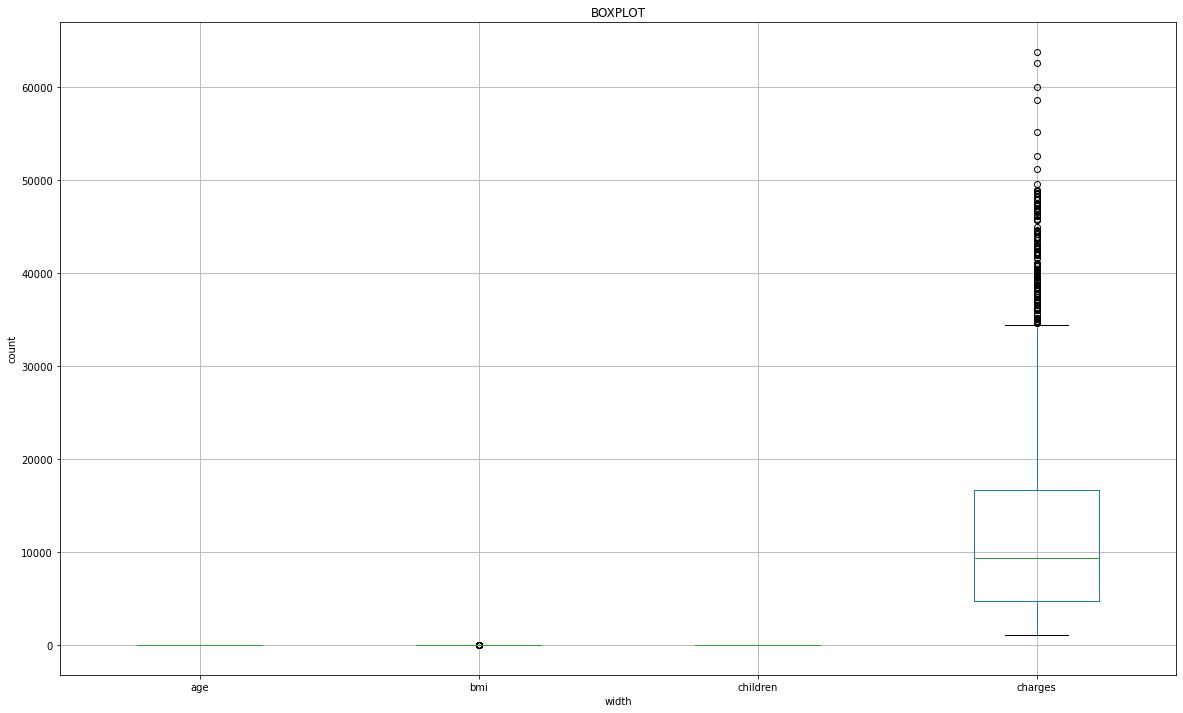

In [306]:
#checking for outliers

plt.figure(figsize = (20,12))
insur_copy.boxplot()
plt.title("BOXPLOT")
plt.xlabel('width')
plt.ylabel('count')


Therefore, the columns charges and bmi have outliers

c:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

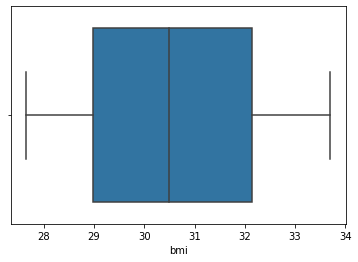

In [307]:
#Removing outliers for mbi


z_scores = np.abs((insur_copy['bmi'] - insur_copy['bmi'].mean()) / insur_copy['bmi'].std())

threshold = 0.5

insur_copy = insur_copy[z_scores < threshold]

sns.boxplot(insur_copy.bmi)


c:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

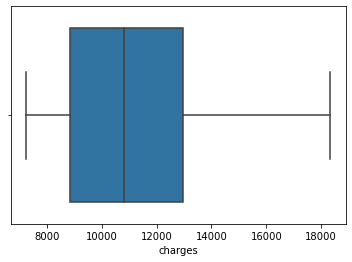

In [308]:
#Removing outliers for mbi


z_scores = np.abs((insur_copy['charges'] - insur_copy['charges'].mean()) / insur_copy['charges'].std())

threshold = 0.5

insur_copy = insur_copy[z_scores < threshold]

sns.boxplot(insur_copy.charges)



3. Visualize the age distribution for the column ‘age’ and comment on the results in a markdown cell as well. (Ensure your visualization is of an appropriate size for effective analysis)

<AxesSubplot:xlabel='age', ylabel='Count'>

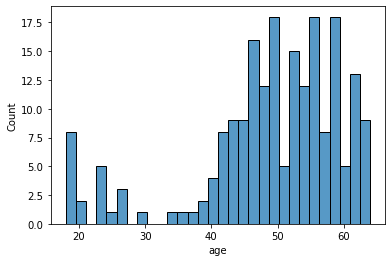

In [309]:
sns.histplot(data=insur_copy, x="age", bins=30)

From the above visualization, people with higher ages subscribe more for insurance than the younger ones

4. Isolate all the continuous and discrete columns into their respective lists named ‘numerical_continuous’ and ‘numerical_discrete’ respectively.

In [310]:
insur_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 1333
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       204 non-null    int64  
 1   sex       204 non-null    object 
 2   bmi       204 non-null    float64
 3   children  204 non-null    int64  
 4   smoker    204 non-null    object 
 5   region    204 non-null    object 
 6   charges   204 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 20.9+ KB


In [311]:

numerical_continuous = insur_copy.select_dtypes(include=['float64']).columns.tolist()
numerical_discrete = insur_copy.select_dtypes(include=['int64']).columns.tolist()

print("numerical_continuous: ", numerical_continuous)
print("numerical_discrete: ", numerical_discrete)


numerical_continuous:  ['bmi', 'charges']
numerical_discrete:  ['age', 'children']


<AxesSubplot:>

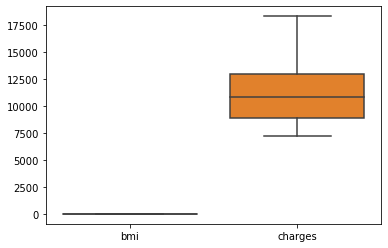

In [312]:
sns.boxplot(data=insur_copy[["bmi", "charges"]], orient="v")



The outliers were removed earlier as I was doing EDA

7. Isolate all the categorical column names into a list named ‘categorical’.

In [313]:
categorical_vars = insur_copy.select_dtypes(include=['object']).columns.tolist()
print("categorical: ", categorical_vars)


categorical:  ['sex', 'smoker', 'region']


8. Visually identify the outliers in the discrete and categorical features and resolve them using the combined rare levels method.

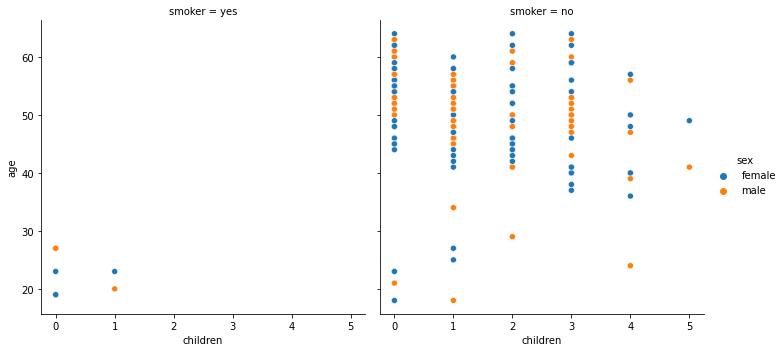

In [314]:

sns.relplot( x="children", y="age", data =  insur_copy, col = "smoker", hue = "sex")


In [315]:

# create a list of rare combinations and their corresponding values in the two discrete columns
rare_combinations_values = []
for comb in rare_combinations_values:
    rare_rows = insur_copy[(insur_copy['sex'] == comb[0]) & (insur_copy['smoker'] == comb[1]) & (insur_copy['region'] == comb[2])]
    rare_values = rare_rows[['age', 'children']].values.tolist()
    rare_combinations_values.append((comb, rare_values))

# identify outliers based on the threshold = 3
outliers = []
for comb, values in rare_combinations_values:
    for v in values:
        if abs(v[0] - np.mean([x[0] for x in values])) > 3 or \
            abs(v[1] - np.mean([x[1] for x in values])) > 3:
            outliers.append((comb, v))
            
# remove outliers from the dataframe
for outlier in outliers:
    insur_copy = insur_copy.drop(insur_copy[(insur_copy['sex'] == outlier[0][0]) & \
                    (insur_copy['smoker'] == outlier[0][1]) & \
                    (insur_copy['region'] == outlier[0][2]) & \
                    (insur_copy['age'] == outlier[1][0]) & \
                    (insur_copy['children'] == outlier[1][1])].index)


9. Encode the discrete and categorical features with one of the measures of central tendency of your choosing.

In [317]:
insur_copy["sex"] = insur_copy["sex"].astype('category')
insur_copy["smoker"] = insur_copy["smoker"].astype('category')
insur_copy["region"] = insur_copy["region"].astype('category')


insur_copy.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [318]:
mode_encoder = LabelEncoder()

# encode categorical columns with mode
for col in ['sex', 'smoker', 'region']:
    mode = insur_copy[col].mode()[0]
    insur_copy[col] = insur_copy[col].fillna(mode)
    insur_copy[col] = mode_encoder.fit_transform(insur_copy[col])

# encode discrete columns with mode
for col in ['age', 'children']:
    mode = insur_copy[col].mode()
    insur_copy[col] = insur_copy[col].fillna(mode)
    insur_copy[col] = mode_encoder.fit_transform(insur_copy[col])

insur_copy

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
6,20,0,33.440,1,0,2,8240.58960
7,11,0,27.740,3,0,1,7281.50560
16,26,0,30.780,1,0,0,10797.33620
25,33,0,27.720,3,0,2,14001.13380
...,...,...,...,...,...,...,...
1315,0,1,28.310,1,0,0,11272.33139
1325,35,1,33.535,0,0,0,13143.33665
1327,25,1,30.030,1,0,2,9377.90470
1331,4,0,33.400,0,0,3,10795.93733


10. Separate your features from the target appropriately. Narrow down the number of features to 5 using the most appropriate and accurate method. Which feature had to be dropped and what inference would you give as the main contributor of dropping the given feature.

In [319]:
insur_copy = insur_copy.drop(columns=["bmi","region"])


In [323]:
insur_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 1333
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       204 non-null    int64  
 1   sex       204 non-null    int32  
 2   children  204 non-null    int64  
 3   smoker    204 non-null    int32  
 4   charges   204 non-null    float64
dtypes: float64(1), int32(2), int64(2)
memory usage: 16.1 KB


The reason for dropping the above features is because they do not significantly affect the performance of our target thus we can drop them and keep our dataset as small as possible for effecient machine learning

In [324]:
#splitting the insur_copy

from sklearn.model_selection import train_test_split
#Separating the features from the target
X = insur_copy.drop('charges', axis=1)
y = insur_copy['charges']

#splitting the insur_copyset into the training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
